# Integral de Fourier

Considere la función pulso unitario: f(x)=1 si -1 <= x <= 1, 0 en otro caso. \\
a) Grafique esta función.\
b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.\
c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b).\
Ver páginas 61 y 62 del Kreyszig.


In [2]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos la funcion
def f(x):
  return 1 if -1 <= x <= 1 else 0



a) Grafique esta función

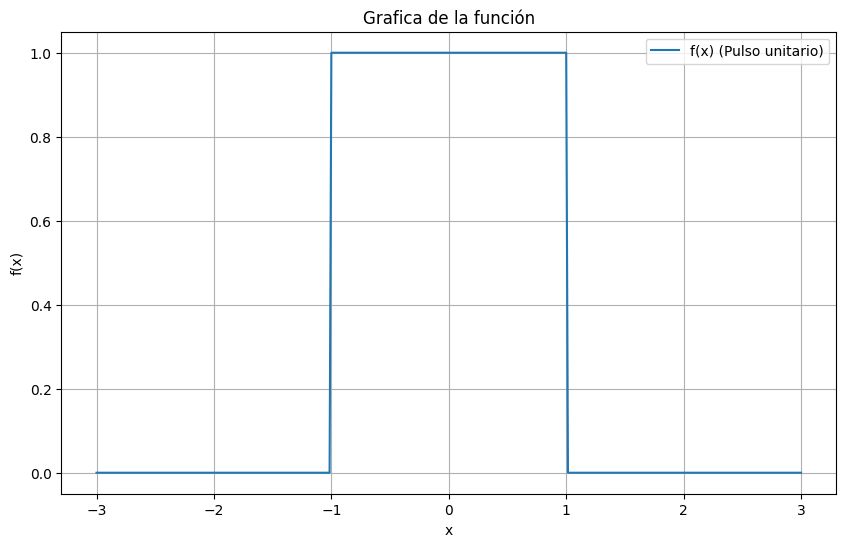

In [3]:

x_vals = np.linspace(-3, 3, 400)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) (Pulso unitario)')
plt.title('Grafica de la función')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.


In [10]:

import sympy as sp

# Definir símbolos
x, k = sp.symbols('x k', real=True)
f_x = 1  # entre -1 y 1

# Transformada de Fourier (F(k))
F_k = sp.integrate(sp.exp(-sp.I * k * x), (x, -1, 1))
F_k = sp.simplify(F_k)

# Inversa de la transformada (reconstrucción de f(x))
f_x_recon = (1/(2*sp.pi)) * sp.integrate(F_k * sp.exp(sp.I * k * x), (k, -sp.oo, sp.oo))

# Mostrar resultados
print("Transformada de Fourier F(k):")
sp.pprint(F_k)
print("\nReconstrucción simbólica de f(x):")
sp.pprint(f_x_recon)


Transformada de Fourier F(k):
⎧2⋅sin(k)                   
⎪────────  for k > 0 ∨ k < 0
⎨   k                       
⎪                           
⎩   2          otherwise    

Reconstrucción simbólica de f(x):
∞                                        
⌠                                        
⎮  ⎧   ⅈ⋅k⋅x                             
⎮  ⎪2⋅ℯ     ⋅sin(k)                      
⎮  ⎪───────────────  for k > 0 ∨ k < 0   
⎮  ⎨       k                           dk
⎮  ⎪                                     
⎮  ⎪      ⅈ⋅k⋅x                          
⎮  ⎩   2⋅ℯ               otherwise       
⌡                                        
-∞                                       
─────────────────────────────────────────
                   2⋅π                   


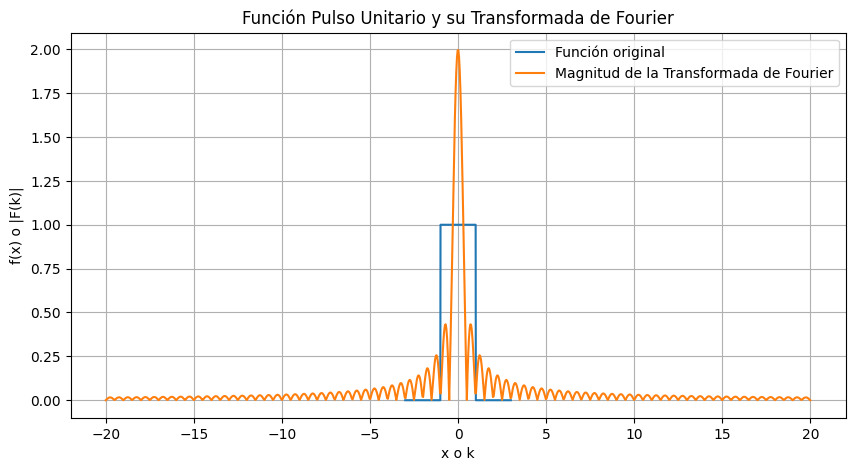

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir variables
x, k = sp.symbols('x k', real=True)

# Definir la función pulso unitario
def f(x):
    return sp.Piecewise((1, (x >= -1) & (x <= 1)), (0, True))

# Calcular la transformada de Fourier
F_k = sp.fourier_transform(f(x), x, k)

# La representación como integral de Fourier sería:
f_reconstruida = 1/(2*sp.pi) * sp.integrate(F_k * sp.exp(sp.I*k*x), (k, -sp.oo, sp.oo))

# Simplificar la expresión
F_k_simplificado = sp.simplify(F_k)# Convertir a funciones numéricas
f_numeric = sp.lambdify(x, f(x), 'numpy')
F_k_numeric = sp.lambdify(k, F_k_simplificado, 'numpy')

# Rango para graficar
x_vals = np.linspace(-3, 3, 1000)

# Gráfico de la función original
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_numeric(x_vals), label='Función original')

# Gráfico de la reconstrucción usando la integral de Fourier
# (Esto requeriría una integración numérica más compleja)
# Para simplificar, mostramos solo la transformada
k_vals = np.linspace(-20, 20, 1000)
plt.plot(k_vals, np.abs(F_k_numeric(k_vals)), label='Magnitud de la Transformada de Fourier')

plt.title('Función Pulso Unitario y su Transformada de Fourier')
plt.xlabel('x o k')
plt.ylabel('f(x) o |F(k)|')
plt.legend()
plt.grid(True)
plt.show()


c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b).

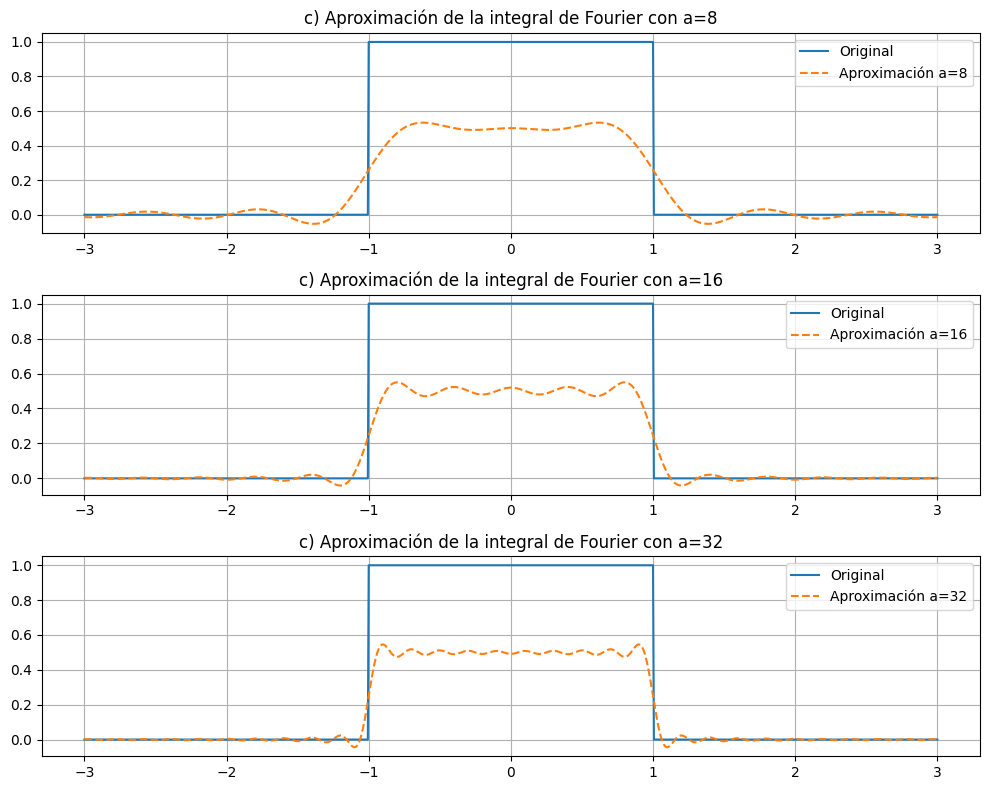

In [14]:
a_vals = [8, 16, 32]

# Calculate f_vals using the previously defined function f and x_vals
f_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 8))
for i, a_val in enumerate(a_vals, 1):
    def approx_f(x_val):
        integrand = lambda k: np.cos(k * x_val) * np.sinc(k / np.pi)
        result, _ = quad(integrand, 0, a_val)
        return result / np.pi

    f_approx = np.vectorize(approx_f)(x_vals)

    plt.subplot(3, 1, i)
    plt.plot(x_vals, f_vals, label='Original')
    plt.plot(x_vals, f_approx, '--', label=f'Aproximación a={a_val}')
    plt.legend()
    plt.grid(True)
    plt.title(f'c) Aproximación de la integral de Fourier con a={a_val}')

plt.tight_layout()
plt.show()